# Successive halving
---------------------------------

This example shows how to compare multiple tree-based models using successive halving.

Import the boston dataset from [sklearn.datasets](https://scikit-learn.org/stable/datasets/index.html#boston-dataset).
 This is a small and easy to train dataset whose goal is to predict house prices.

## Load the data

In [1]:
# Import packages
from sklearn.datasets import load_boston
from atom import ATOMRegressor

In [2]:
# Load the dataset's features and targets
X, y = load_boston(return_X_y=True)

## Run the pipeline

In [3]:
atom = ATOMRegressor(X, y, verbose=1, random_state=1)

<< ================== ATOM ================== >>
Algorithm task: regression.

Dataset stats ================== >>
Shape: (506, 14)
Scaled: False
-----------------------------------
Train set size: 405
Test set size: 101



In [4]:
# We can compare tree-based models via successive halving
atom.successive_halving(
    models=['tree', 'bag', 'et', 'rf', 'lgb', 'catb'],
    metric='mae',
    bagging=5
)


Training ===================================== >>
Metric: neg_mean_absolute_error


Run: 0 ================================ >>
Models: Tree0, Bag0, ET0, RF0, LGB0, CatB0
Size of training set: 405 (17%)
Size of test set: 101


Results for Decision Tree:         
Fit ---------------------------------------------
Train evaluation --> neg_mean_absolute_error: -0.0000
Test evaluation --> neg_mean_absolute_error: -3.3257
Time elapsed: 0.000s
Bagging -----------------------------------------
Evaluation --> neg_mean_absolute_error: -4.3307 ± 0.5250
Time elapsed: 0.000s
-------------------------------------------------
Total time: 0.000s


Results for Bagging Regressor:         
Fit ---------------------------------------------
Train evaluation --> neg_mean_absolute_error: -1.3054
Test evaluation --> neg_mean_absolute_error: -2.6950
Time elapsed: 0.000s
Bagging -----------------------------------------
Evaluation --> neg_mean_absolute_error: -3.0957 ± 0.2677
Time elapsed: 0.000s
--------------

## Analyze results

In [5]:
# The results dataframe now is multi-index
atom.results

metric_train metric_test time_fit mean_bagging std_bagging  \
n_models model                                                              
6        Tree0           -0    -3.32574   0.000s     -4.33069    0.525026   
         Bag0      -1.30537    -2.69505   0.000s     -3.09566    0.267668   
         ET0   -2.25624e-14    -2.15409   0.000s     -2.55543    0.170823   
         RF0       -1.15087     -2.4143   0.000s      -2.9574    0.225311   
         LGB0      -3.39651    -4.48727   0.000s     -4.84854    0.267874   
         CatB0    -0.080555    -2.39907   0.000s      -2.9193    0.260378   
3        ET1   -2.31519e-14    -2.23608   0.000s     -2.60165    0.289034   
         RF1      -0.981978    -2.50547   0.000s     -2.76189    0.194678   
         CatB1     -0.28355    -2.42003   0.000s      -2.5595    0.276791   
1        CatB2    -0.397799    -1.87759   0.000s     -2.05146   0.0902269   

               time_bagging    time  
n_models model                       
6        Tree0       0.000s  0.000s  
         Bag0        0.000s  0.000s  
         ET0         0.000s  0.000s  
         RF0         0.000s  0.000s  
         LGB0        0.000s  0.000s  
         CatB0       0.000s  0.000s  
3        ET1         0.000s  0.000s  
         RF1         0.000s  0.000s  
         CatB1       0.000s  0.000s  
1        CatB2       0.000s  0.000s

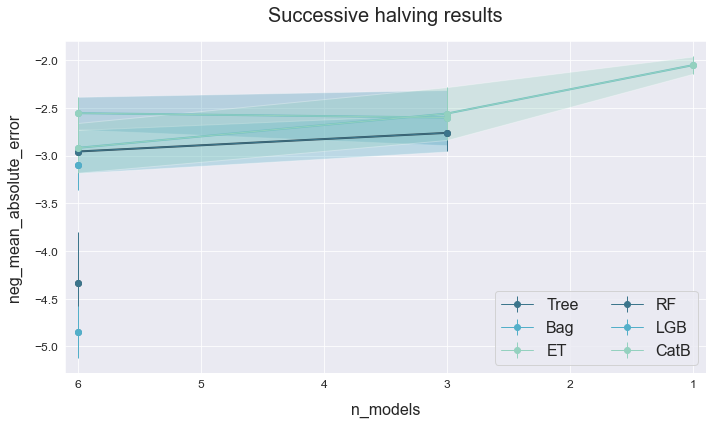

In [6]:
# Plot the successive halving's results
atom.plot_successive_halving()